In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
# Python Project Template
# 1. Prepare Problem
# a) Load libraries
# b) Load dataset

import pandas as pd  # dataframes manipulation.
import numpy as np  # nd array manipulation.
import matplotlib.pyplot as plt  # for visualizing the data.

# Load libraries
from matplotlib import pyplot
from sklearn.model_selection import train_test_split  # to split the data into training and testing data.
from sklearn.model_selection import KFold  # module lets us measure the performance of our model.
from sklearn.model_selection import cross_val_score  # to calculate the score of our model.
from sklearn.metrics import classification_report  # gives us a report about our model.
from sklearn.metrics import confusion_matrix  # a way of showing the strength of our model.

data = pd.read_csv('../input/iris/Iris.csv', index_col='Id')

# Describtive Analysis and Visualizing the analysis.
### First Section for describtive analysis.
     --> The reason here is to understand your data so you can get the best of it.
### second section for Visualizing the data.
    --> The Easiest way to understand your data.

In [3]:
# here we will encode the target column to use it in Visulaization. As we can't work on it with out encoding.

# Using this line of code will return the unique values of the target variable.
print('The Uique values in target variable \n\n', data['Species'].unique())

# Now we can encode each value with a number.
dic = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
data['Species'] = data['Species'].map(dic).astype(int)
data['Species']

The Uique values in target variable 

 ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Id
1      0
2      0
3      0
4      0
5      0
      ..
146    2
147    2
148    2
149    2
150    2
Name: Species, Length: 150, dtype: int64

In [4]:
# Seeing the head of our dataset, give it a look it worth
data.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0


In [5]:
# Showing the shape lets us understand how many data are we dealing with and how many columns are there.

print('shape is \n\n', data.shape)

shape is 

 (150, 5)


In [6]:
# Knowing the names of our columns is a good thing, As we will work on them in the coming steps.

print('data columns are\n\n', data.columns) 

data columns are

 Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [7]:
# Some statistical analysis about the mean and median and max and standard_deviation.

data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
# Knowing the skew is a very important thing, this lets us understand if the data is normaly distribution
# As if the skew gets close to zero this means it is normaly distributed.

print('skew is \n\n', data.skew())

skew is 

 SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
Species          0.000000
dtype: float64


In [9]:
# Showing the unique values in the target variable now.

print('The Uique values in target variable \n\n', data['Species'].unique())

The Uique values in target variable 

 [0 1 2]


In [10]:
# This line of code shows us how many values of each unique category in the target variable.

print('How many entry in each target class \n\n', data['Species'].value_counts()) 

# the target column is normaly distibuted.

How many entry in each target class 

 0    50
1    50
2    50
Name: Species, dtype: int64


In [11]:
print('correlations are \n\n', data.corr())

correlations are 

                SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954   
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544   
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757   
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000   
Species             0.782561     -0.419446       0.949043      0.956464   

                Species  
SepalLengthCm  0.782561  
SepalWidthCm  -0.419446  
PetalLengthCm  0.949043  
PetalWidthCm   0.956464  
Species        1.000000  


# Visualizaion part.

array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>],
       [<AxesSubplot:title={'center':'Species'}>, <AxesSubplot:>]],
      dtype=object)

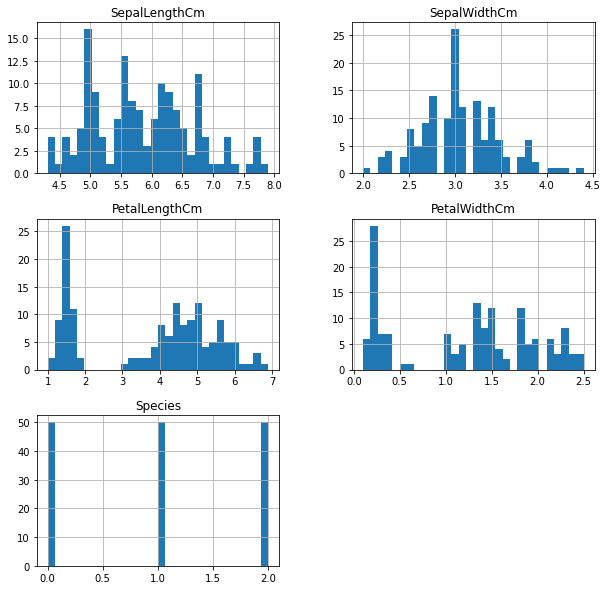

In [12]:
data.hist(bins=30 , figsize=(10, 10))
# most of the columns are normaly distributed.

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

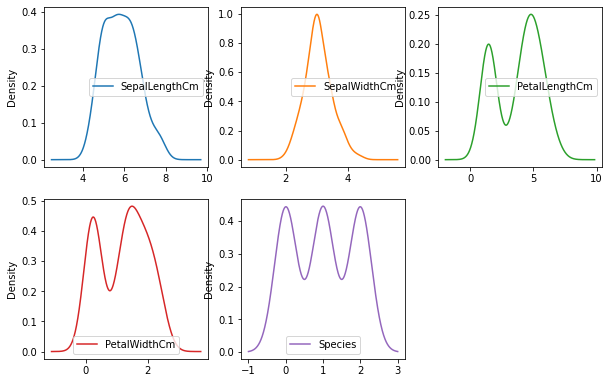

In [13]:
data.plot(kind='density', subplots=True, layout=(3, 3), sharex=False, figsize=(10, 10))
# An easy way to visualize the data and get insights.

SepalLengthCm       AxesSubplot(0.125,0.657941;0.227941x0.222059)
SepalWidthCm     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
PetalLengthCm    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
PetalWidthCm        AxesSubplot(0.125,0.391471;0.227941x0.222059)
Species          AxesSubplot(0.398529,0.391471;0.227941x0.222059)
dtype: object

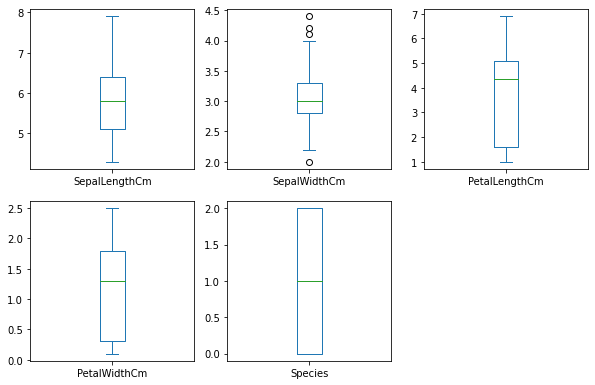

In [14]:
data.plot(kind='box', subplots=True, layout=(3, 3), sharex=False, sharey=False, figsize=(10, 10))

# sepal width feature has some outliers.

[Text(0, 0, 'SepalLengthCm'),
 Text(0, 1, 'SepalWidthCm'),
 Text(0, 2, 'PetalLengthCm'),
 Text(0, 3, 'PetalWidthCm'),
 Text(0, 4, 'Species')]

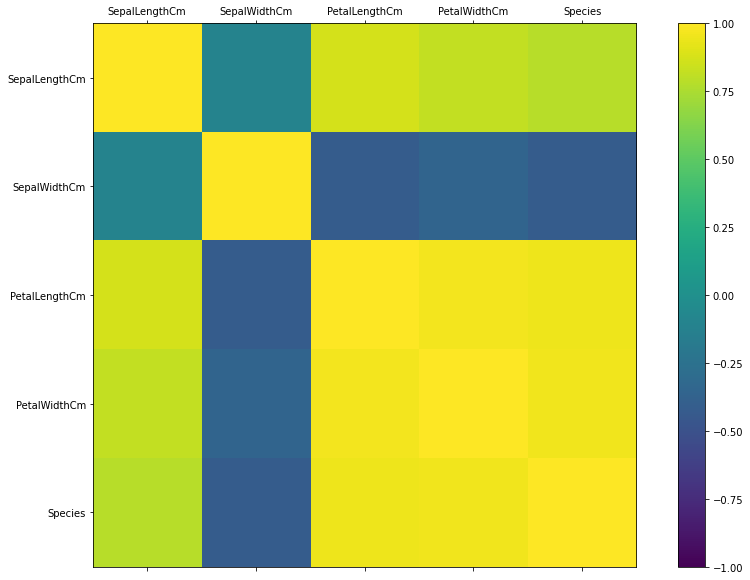

In [15]:
# Focus up here, as the color of each square gets lighter this means that the two columns are so correlated.
# If a column is so correlated to the target this means we have a very good thing to train on.

correlations = data.corr()
# plot correlation matrix
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, data.shape[1])
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)

array([[<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='PetalWidthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>],
       [<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='PetalWidthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>],
       [<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>,
        <AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalLengthCm'>,
        <AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalLengthCm'>,
        <AxesSubplot:xlabel='PetalWidthCm', ylabel='PetalLengthCm'>,
        <AxesSubplot:xlabel='Species', yl

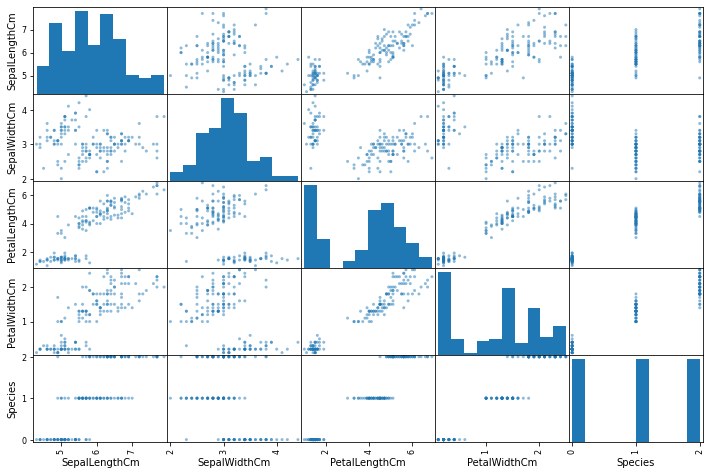

In [16]:
# gathering correlations in scatter plot.

pd.plotting.scatter_matrix(data, figsize=(12, 8))

# Preprocessing step:
### Cleaning..
### imputing NaN values.
### Encoding categorical variables.
### Feature Engineering.


In [17]:
# As we have seen in the box plot there were some outliers in the SepalWidthCm column and here we are dealing with them 
# we will remove those outliers from the column.

data.loc[data['SepalWidthCm'] > 4.0, 'SepalWidthCm']

data.loc[data['SepalWidthCm'] <= 2.0, 'SepalWidthCm']

# we need to remove those indecies form the data. [15, 32, 33, 60] as they represent outliers

data.drop([15, 32, 33, 60], inplace=True)

In [18]:
# See if there are any missing values in the data.
data.isnull().sum()

# There is no NaN values in the data.

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [19]:
# See if there are categorical features in the dataset.
data.select_dtypes('object')

# there are no categorical features in the dataset.

""
Id
1
2
3
4
5
...
146
147
148


In [20]:
# see if we can make new features that might help.
# as we have the length and width we can get the area and the perimeter
# I don't know about the real formulas to calculate the area and perimeter of a leaf but i just did
# it as a trial.

data['sepal_area'] = data['SepalLengthCm'] * data['SepalLengthCm']
data['petal_area'] = data['PetalLengthCm'] * data['PetalLengthCm']

data['sepal_perimeter'] = (data['SepalLengthCm'] + data['SepalLengthCm']) * 2
data['petal_perimeter'] = (data['PetalLengthCm'] + data['PetalLengthCm']) * 2

# ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
#        'petal width (cm)', 'target']

In [21]:
X = data.drop('Species', axis=1)
y = data['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# Comparing some models to see which one is the best

Knn 0.9448275862068967 0.03516565181788128
svc 0.9450574712643679 0.027761892670253856
Dtc 0.9519540229885057 0.027704726244014412
Rdf 0.9517241379310345 0.035165651817881276
adb 0.9450574712643679 0.01717842914231672
grdb 0.9586206896551724 0.03378606541769902
Gaus 0.9448275862068964 0.035165651817881276
LDA 0.9793103448275863 0.016893032708849485
LogR 0.9519540229885057 0.027704726244014405
MLP 0.8919540229885058 0.11369437258738611


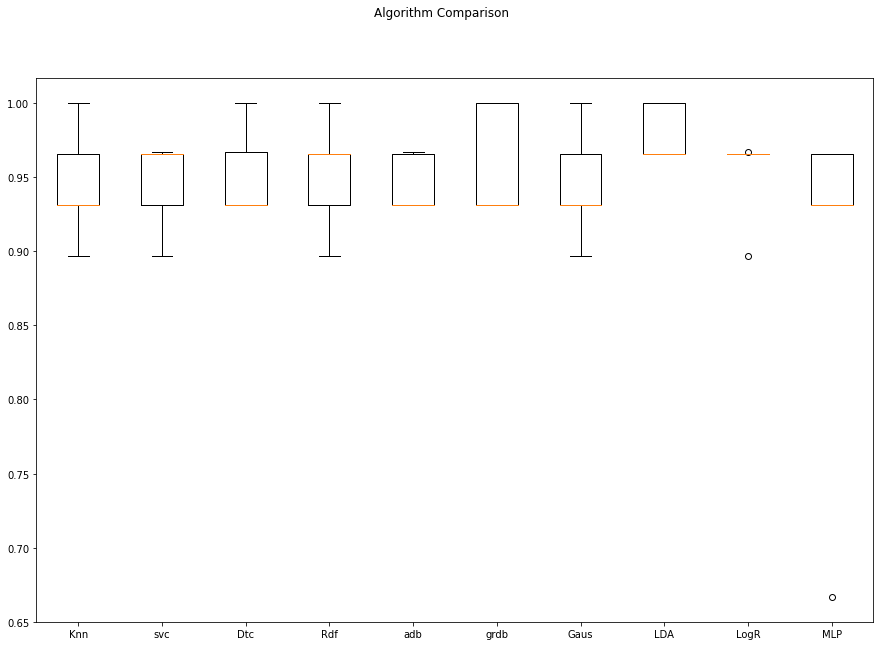

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

models = [
    ('Knn', KNeighborsClassifier()),
    ('svc', SVC()),
    ('Dtc', DecisionTreeClassifier()),
    ('Rdf', RandomForestClassifier()),
	('adb', AdaBoostClassifier()),
    ('grdb', GradientBoostingClassifier()),
    ('Gaus', GaussianNB()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('LogR', LogisticRegression(max_iter=1000)),
    ('MLP', MLPClassifier(max_iter=1000))
]
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=5, random_state=0, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(name, cv_results.mean(), cv_results.std())
# boxplot algorithm comparison
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [23]:
from sklearn.metrics import confusion_matrix

model = LinearDiscriminantAnalysis()

model.fit(X_train, y_train)
pred = model.predict(X_test)

conf_met = confusion_matrix(y_test, pred)
print(conf_met)

# As you can see LinearDiscriminantAnalysis() can ba a lead model as it makes no mistakes.

[[11  0  0]
 [ 0 14  0]
 [ 0  0 19]]


In [24]:
model = LinearDiscriminantAnalysis()

In [25]:
model.fit(X_train, y_train)
print('LinearDiscriminantAnalysis score on the test set ', model.score(X_test, y_test))

LinearDiscriminantAnalysis score on the test set  1.0
